In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("classification.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df=data.dropna()

In [5]:
print(len(data),"before delete")
print(len(df),'after delete')

614 before delete
480 after delete


In [9]:
len(data)-len(df)

134

# Exploratory Data Analysis

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
df.groupby(["Education","Loan_Status"])["Loan_Status"].count()\
    /df.groupby(["Education"])["Loan_Status"].count()

Education     Loan_Status
Graduate      N              0.292428
              Y              0.707572
Not Graduate  N              0.371134
              Y              0.628866
Name: Loan_Status, dtype: float64

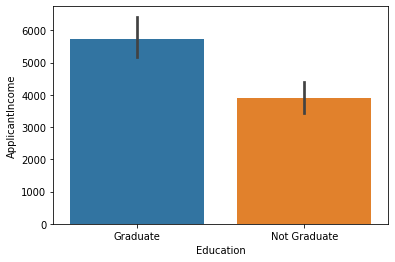

In [12]:
sns.barplot(x="Education",y='ApplicantIncome',data=df)

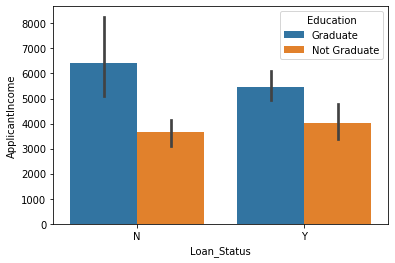

In [13]:
sns.barplot(x="Loan_Status",y='ApplicantIncome',hue='Education',data=df)

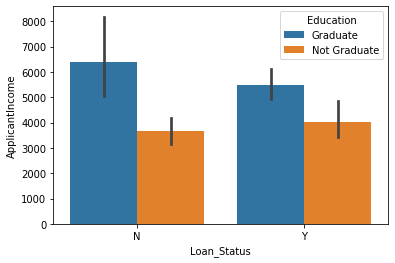

In [14]:
sns.barplot(x="Loan_Status",y='ApplicantIncome',hue='Education',data=df)

In [15]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Data Cleaning

In [7]:
def data_cleaning(d):
    d=d.copy()
    y=d['Loan_Status'].map(lambda x: 1 if x=="Y" else 0)
    d=d[[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
    d.Gender=d.Gender.map(lambda x: 1 if x=="Male" else 0)
    d.Married=d.Married.map(lambda x:1 if x=="Yes" else 0)
    d.Dependents=d.Dependents.map(lambda x: 3 if str(x)=="3+" else int(x))
    d.Education=d.Education.map(lambda x: 1 if x=="Graduate" else 0)
    d.Self_Employed=d.Self_Employed.map(lambda x: 1 if x=="Yes" else 0)
    d=d.join(pd.get_dummies(d.Property_Area)).drop(['Property_Area'],axis=1)
    return d,y
    

In [8]:
X,y=data_cleaning(df)


In [9]:
print(X.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Rural', 'Semiurban', 'Urban'],
      dtype='object')


In [19]:
x=df[['Self_Employed', 'ApplicantIncome', 'CoapplicantIncome']]
for col,o in zip(df[['Gender', 'Married','Property_Area','Loan_Amount_Term']].columns,df[['Gender', 'Married','Property_Area','Loan_Amount_Term']].dtypes):
    print(o)
    if (o=="object") and len(df[col].unique())==2:
        x=x.join(pd.get_dummies(df[col]).\
                 rename(columns={df[col].unique()[1]:col+df[col].unique()[1]}))\
        .drop([df[col].unique()[0]],axis=1)
    elif (o=="object") and len(df[col].unique())>2:
        x=x.join(pd.get_dummies(df[col]))
x

object
object
object
float64


,Self_Employed,ApplicantIncome,CoapplicantIncome,GenderFemale,MarriedNo,Rural,Semiurban,Urban
1,No,4583,1508.0,0,0,1,0,0
2,Yes,3000,0.0,0,0,0,0,1
3,No,2583,2358.0,0,0,0,0,1
4,No,6000,0.0,0,1,0,0,1
5,Yes,5417,4196.0,0,0,0,0,1
6,No,2333,1516.0,0,0,0,0,1
7,No,3036,2504.0,0,0,0,1,0
8,No,4006,1526.0,0,0,0,0,1
9,No,12841,10968.0,0,0,0,1,0
10,No,3200,700.0,0,0,0,0,1


In [10]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X,y)
print("accuracy",lr.score(X,y))

accuracy 0.8125


c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
for col,m in zip(X.columns,lr.coef_[0]):
    print(col,"*",m,"+")
print(lr.intercept_[0])

Gender * 0.18953193258605866 +
Married * 0.3979368514791427 +
Dependents * 0.053233820321660304 +
Education * 0.31208639815838807 +
Self_Employed * -0.1258894940455408 +
ApplicantIncome * -1.586354494522131e-06 +
CoapplicantIncome * -4.730911709951797e-05 +
LoanAmount * -0.002890173833730842 +
Loan_Amount_Term * -0.004263074920122958 +
Credit_History * 2.7640230263051118 +
Rural * -0.27275271442441756 +
Semiurban * 0.4070272158175193 +
Urban * -0.2685866030343092 +
-0.13431210164120716


Z=Gender * 0.1895319923476763 +
Married * 0.3979369153057798 +
Dependents * 0.0532337759221262 +
Education * 0.31208643672594927 +
Self_Employed * -0.12588948456551205 +
ApplicantIncome * -1.5863537024274261e-06 +
CoapplicantIncome * -4.730911938653908e-05 +
LoanAmount * -0.0028901740283690685 +
Loan_Amount_Term * -0.004263075254672131 +
Credit_History * 2.7640229863153793 +
Rural * -0.2727527559366654 +
Semiurban * 0.4070273166484802 +
Urban * -0.2685865887090895 +
-0.134312027997271

p=1/(1+e**-Z)

In [12]:
lr.predict(X)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [13]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve

In [14]:
confusion_matrix(y,lr.predict(X),labels=[1,0])

array([[324,   8],
       [ 82,  66]], dtype=int64)

In [15]:
y_prob=lr.predict_proba(X)[:,1]


(array([ 25.,  28.,  11.,   7.,   3.,  12.,  43., 135., 146.,  70.]),
 array([0.06743423, 0.15685284, 0.24627146, 0.33569007, 0.42510869,
        0.51452731, 0.60394592, 0.69336454, 0.78278315, 0.87220177,
        0.96162038]),
 <a list of 10 Patch objects>)

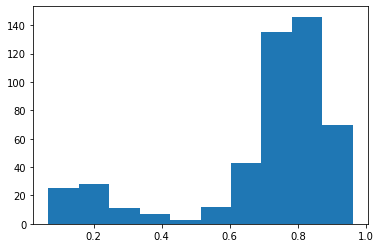

In [16]:
plt.hist(y_prob)

In [27]:
from sklearn.preprocessing import binarize

In [28]:
y_prob3=[ 0 if x<=0.3 else 1 for x in np.nditer(y_prob)]
y_prob7=[ 0 if x<=0.7 else 1 for x in np.nditer(y_prob)]

In [29]:
print(confusion_matrix(y,y_prob3,labels=[1,0]))
confusion_matrix(y,y_prob7,labels=[1,0])

[[326   6]
 [ 94  54]]


array([[284,  48],
       [ 62,  86]], dtype=int64)

In [17]:
fpr,tpr,treshold=roc_curve(y,y_prob)

Text(0, 0.5, 'TPR')

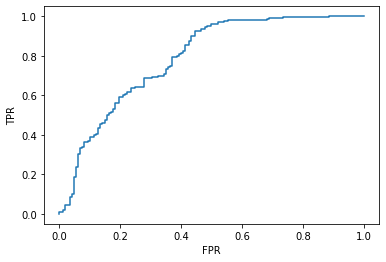

In [18]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [19]:
curve=roc_auc_score(y,y_prob)

In [20]:
curve

0.7880576359492022